In [31]:

sqtl2=pd.read_excel('snp_data/sQTL.xlsx')

In [ ]:

import pandas as pd
import numpy as np
import scipy
import scipy.sparse
import scipy.stats
import os
import scipy.io as sio
%matplotlib inline
from pylab import *

# Plotting Params:
rc('mathtext', default='regular')
fsize=14

sys.path.append('/usr/local/lib/python3.6/site-packages')
sys.path.append('/home/ychwang/jklib')


logit = lambda x: log(x)-log(1-x)
expit = lambda x: 1./(1.+exp(-x))

def get_accuracy(predictions,data):
    accuracy = {'Correct':sum(sign(predictions)==sign(data)),
                'Incorrect':sum(sign(predictions)!=sign(data)),
                'Total':len(predictions),
                'Total_with_Change':sum(abs(data)>0),
                'R2':scipy.stats.pearsonr(predictions,data)[0]**2,
                'R2_P_value':scipy.stats.pearsonr(predictions,data)[1]}
    return accuracy

sqtl=pd.read_excel('snp_data/sQTL.xlsx')

In [2]:
from keras.models import load_model
from pkg_resources import resource_filename
from utils2 import one_hot_encode
import numpy as np

# our_paths = ('snp_data/a5ss_r2_0805.h5'.format(x) for x in range(1));context=200
# our_paths = ('snp_data/only_a5ss_200_7.h5'.format(x) for x in range(1));context1=100
gtex_paths = ('snp_data/spliceai{}.h5'.format(x) for x in range(1,6));context=5000

# our_models = [load_model(resource_filename('spliceai', x)) for x in our_paths]
gtex_models = [load_model(resource_filename('spliceai', x)) for x in gtex_paths]



# paths = ('models/spliceai{}.h5'.format(x) for x in range(1, 6))
# models = [load_model(resource_filename('spliceai', x)) for x in paths]


In [3]:
import jklib
from jklib.genome import *
from jklib import REFERENCE

h_chr  = loadBlatOutput(REFERENCE.RefFlat.hg38, by="chrom")

먼저 ref에 있는 염기들과 locus함수로 불러온 해당 위치의 염기가 같은지 체크

<AxesSubplot:>

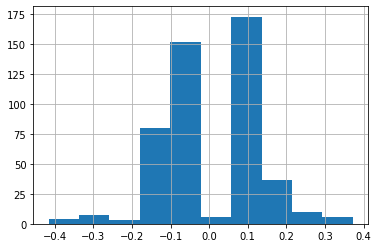

In [41]:
sqtl['slope'].hist()

<AxesSubplot:>

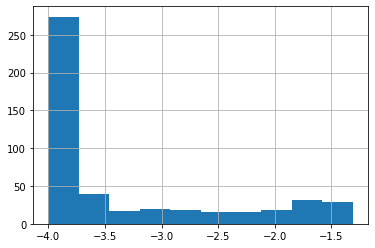

In [40]:
log10(sqtl['pval_perm']).hist()

In [48]:
sqtl[(sqtl['pval_perm']<=0.0001) & (sqtl['strand']=='+') & (abs(sqtl['slope'])>=0.2)]

,phenotype_id,gene_name,strand,tss_distance,chr,variant_pos,ref,alt,pval_nominal,slope,slope_se,pval_perm,pval_beta,qval,pval_nominal_threshold
1772,chr2:100563509:100566503:clu_33514:ENSG0000011...,PDCL3,+,806,chr2,100563496,C,T,6.810000e-12,0.279538,0.036791,0.0001,2.990000e-05,4.453990e-04,4.940000e-06
3061,chr4:1799812:1801367:clu_28179:ENSG00000068078.17,FGFR3,+,6508,chr4,1799815,A,G,2.700000e-41,-0.347805,0.016982,0.0001,6.920000e-13,2.870000e-11,4.990000e-06
5523,chr8:22589741:22593733:clu_41478:ENSG000001209...,PDLIM2,+,13389,chr8,22591668,C,T,1.950000e-19,0.224680,0.020847,0.0001,7.860000e-12,2.910000e-10,1.130000e-06
5524,chr8:22589741:22593733:clu_41478:ENSG000002418...,C8orf58,+,-7933,chr8,22591668,C,T,1.950000e-19,0.224680,0.020847,0.0001,2.070000e-12,7.990000e-11,7.800000e-07
6895,chr10:104259798:104262979:clu_8163:ENSG0000014...,GSTO1,+,27715,chr10,104263071,AGAG,A,4.280000e-14,0.337869,0.039524,0.0001,2.550000e-08,6.060000e-07,1.800000e-06
7096,chr11:8914930:8919337:clu_4639:ENSG00000166452.11,AKIP1,+,6133,chr11,8917272,T,C,7.560000e-44,0.244477,0.011227,0.0001,1.600000e-26,2.880000e-24,2.360000e-06
7658,chr11:118531871:118532246:clu_6430:ENSG0000014...,TMEM25,+,1049,chr11,118532247,G,T,9.940000e-14,0.214034,0.025503,0.0001,1.180000e-05,1.908340e-04,2.340000e-06


In [32]:
for i in range(12975):
    now_ref = sqtl2['ref'].iloc[i]
    ref_len = len(sqtl2['ref'].iloc[i])
    
    strand_now = sqtl2['strand'].iloc[i]
    
    chr_now = sqtl2['chr'].iloc[i]
    variant_pos = sqtl2['variant_pos'].iloc[i]
    
    now_event = chr_now+':'+str(variant_pos)+'-'+str(variant_pos+ref_len-1)+strand_now
    loc = locus(now_event,assembly='hg38')
    
    now_seq=loc.twoBitFrag().upper()
    if now_seq!=now_ref:
        print(i,strand_now)


0 -
1 -
2 -
3 -
6 -
8 -
12 -
13 -
14 -
15 -
18 -
20 -
22 -
23 -
24 -
26 -
27 -
33 -
35 -
36 -
37 -
38 -
39 -
40 -
41 -
42 -
43 -
46 -
48 -
50 -
52 -
55 -
57 -
58 -
60 -
61 -
62 -
63 -
65 -
69 -
70 -
71 -
73 -
74 -
75 -
76 -
77 -
78 -
79 -
82 -
84 -
90 -
92 -
93 -
98 -
99 -
101 -
109 -
112 -
114 -
116 -
120 -
122 -
124 -
127 -
128 -
134 -
141 -
143 -
148 -
149 -
150 -
151 -
152 -
153 -
156 -
157 -
159 -
160 -
162 -
163 -
164 -
165 -
168 -
169 -
170 -
172 -
174 -
175 -
176 -
178 -
181 -
184 -
185 -
186 -
187 -
189 -
190 -
191 -
192 -
193 -
194 -
197 -
198 -
199 -
202 -
209 -
210 -
212 -
213 -
215 -
218 -
219 -
220 -
222 -
223 -
227 -
228 -
230 -
237 -
238 -
239 -
247 -
254 -
255 -
258 -
262 -
263 -
264 -
265 -
266 -
271 -
273 -
274 -
279 -
280 -
284 -
285 -
287 -
288 -
289 -
290 -
292 -
294 -
295 -
296 -
297 -
303 -
305 -
306 -
308 -
309 -
311 -
313 -
316 -
317 -
319 -
320 -
321 -
323 -
325 -
326 -
328 -
329 -
330 -
331 -
332 -
333 -
335 -
338 -
339 -
340 -
346 -
349 -
350 -
351 -
352 -


KeyboardInterrupt: 

sQTL 파일을 불러온 뒤, variant pos가 event에서의 exon, donor와의 거리가 5000 이하인 event들만 필터링<br/>
(거리가 5000보다 멀 경우, spliceai 모델로 변화값 측정이 불가능)

In [5]:
cc=0
tfl=[]
uuu=[]
for i in range(12975):
    l_i,r_i = sqtl['phenotype_id'].iloc[i].split(':')[1:3]
    l_i=int(l_i)
    r_i=int(r_i)
    
    variant_pos = sqtl['variant_pos'].iloc[i]
    
    if abs(l_i-variant_pos)<=5000 and abs(r_i-variant_pos)<=5000:
        tfl.append(True)
        uuu.append(abs(l_i-variant_pos))
    else:
        tfl.append(False)

In [6]:
sqtl=sqtl[np.array(tfl)]

pval_perm이 0.05보다 작은 event만을 사용<br/>
(pval_perm : permutation p-value)

In [36]:
sqtl=sqtl[sqtl['pval_perm']<0.05]

In [8]:
sqtl.columns

Index(['phenotype_id', 'gene_name', 'strand', 'tss_distance', 'chr',
       'variant_pos', 'ref', 'alt', 'pval_nominal', 'slope', 'slope_se',
       'pval_perm', 'pval_beta', 'qval', 'pval_nominal_threshold'],
      dtype='object')

In [50]:
new_sqtl.shape

(7, 15)

In [55]:
new_sqtl=sqtl[(sqtl['pval_perm']<=0.0001) & (sqtl['strand']=='+') & (abs(sqtl['slope'])>=0.2)]
new_effect_size=[]

for i in range(7):
    chr_now = new_sqtl['chr'].iloc[i]
    
    strand_now = new_sqtl['strand'].iloc[i]
    if strand_now =='-':
        continue
    
    ref = new_sqtl['ref'].iloc[i]
    alt = new_sqtl['alt'].iloc[i]
    
    
    l_i,r_i = new_sqtl['phenotype_id'].iloc[i].split(':')[1:3]
    l_i=int(l_i)-5001
    r_i=int(r_i)+6001
    
    variant_pos = new_sqtl['variant_pos'].iloc[i]-l_i
    
    now_event = chr_now+':'+str(l_i)+'-'+str(r_i)+strand_now
    loc = locus(now_event,assembly='hg38')

    
    original_seq=loc.twoBitFrag().upper()
    mut_seq = original_seq[:variant_pos] + alt + original_seq[variant_pos+len(ref):]
    
    donor_seq = original_seq[5002:5204]
    acceptor_seq = original_seq[-6004:-5802]
    
    donor_pos_ref = original_seq.find(donor_seq)-1
    acceptor_pos_ref = original_seq.find(acceptor_seq)+2
    
    
    
    if variant_pos<=donor_pos_ref:
        donor_pos_alt = donor_pos_ref-len(ref)+len(alt)
        acceptor_pos_alt = acceptor_pos_ref-len(ref)+len(alt)
        q=1
        
    elif donor_pos_ref<variant_pos<acceptor_pos_ref:
        donor_pos_alt = donor_pos_ref
        acceptor_pos_alt = acceptor_pos_ref-len(ref)+len(alt)
        q=2
        
    else:
        donor_pos_alt = donor_pos_ref
        acceptor_pos_alt = acceptor_pos_ref
        q=3

    
    print(original_seq[donor_pos_ref+1:donor_pos_ref+3] , original_seq[acceptor_pos_ref-2:acceptor_pos_ref])
#     print(mut_seq[donor_pos_alt+1:donor_pos_alt+3] , mut_seq[acceptor_pos_alt-2:acceptor_pos_alt] , ref,alt,q)
    
#     if strand_now=='+':
#         cc+=1
#         if original_seq[variant_pos:variant_pos+len(ref)]!=ref:
#             print(i)

    
    
    seq_alt_for_donor =      mut_seq[donor_pos_alt-5000:donor_pos_alt+5000+1]
    seq_ref_for_donor = original_seq[donor_pos_ref-5000:donor_pos_ref+5000+1]

    
    x_alt_donor = one_hot_encode(seq_alt_for_donor)[None, :]
    y_alt_donor = np.mean([gtex_models[m].predict(x_alt_donor) for m in range(5)], axis=0)
    
    x_ref_donor = one_hot_encode(seq_ref_for_donor)[None, :]
    y_ref_donor = np.mean([gtex_models[m].predict(x_ref_donor) for m in range(5)], axis=0)
    
    donor_prob_alt = y_alt_donor[0][0][2]
    donor_prob_ref = y_ref_donor[0][0][2]
    
    up = donor_prob_alt/(1-donor_prob_alt)
    down = donor_prob_ref/(1-donor_prob_ref)
    
    effect_size_donor = np.log2(up/down)
    
    
###############################################################################################################

    seq_alt_for_acceptor =      mut_seq[acceptor_pos_alt-5000:acceptor_pos_alt+5000+1]
    seq_ref_for_acceptor = original_seq[acceptor_pos_ref-5000:acceptor_pos_ref+5000+1]

    
    x_alt_acceptor = one_hot_encode(seq_alt_for_acceptor)[None, :]
    y_alt_acceptor = np.mean([gtex_models[m].predict(x_alt_acceptor) for m in range(5)], axis=0)
    
    x_ref_acceptor = one_hot_encode(seq_ref_for_acceptor)[None, :]
    y_ref_acceptor = np.mean([gtex_models[m].predict(x_ref_acceptor) for m in range(5)], axis=0)
    
    acceptor_prob_alt = y_alt_acceptor[0][0][2]
    acceptor_prob_ref = y_ref_acceptor[0][0][2]
    
    up = acceptor_prob_alt/(1-acceptor_prob_alt)
    down = acceptor_prob_ref/(1-acceptor_prob_ref)
    
    effect_size_acceptor = np.log2(up/down)

#     print(effect_size_donor,effect_size_acceptor)
    print( (effect_size_donor+effect_size_acceptor)/2.0 )
    new_effect_size.append( (effect_size_donor+effect_size_acceptor)/2.0 )

GT AG
-0.004755659483999989
GT AG
-1.8702763480782594
GT AG
-0.00518531197420666
GT AG
-0.00518531197420666
GT AG
0.13619957868255658
GT AG
-0.13620643400705842
GT AG
0.31453085660424007


In [62]:
np.array(new_sqtl['slope'])

array([ 0.279538, -0.347805,  0.22468 ,  0.22468 ,  0.337869,  0.244477,
        0.214034])

In [63]:
new_effect_size

[-0.004755659483999989,
 -1.8702763480782594,
 -0.00518531197420666,
 -0.00518531197420666,
 0.13619957868255658,
 -0.13620643400705842,
 0.31453085660424007]

No handles with labels found to put in legend.


0.930373779891674


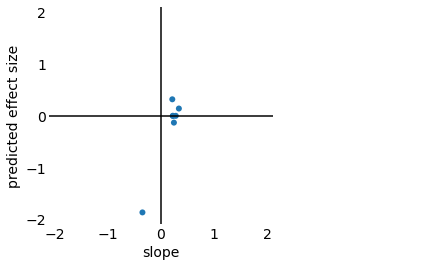

In [65]:

fig = figure(figsize=(4,4))
ax = fig.add_subplot(111)
colors = ['r','limegreen','b']

    
ax.scatter(np.array(new_sqtl['slope']),np.array(new_effect_size),edgecolor='None')
ax.axhline(y=0,c='k')
ax.axvline(x=0,c='k')
ax.axis([-2,2,-2,2]);
leg = ax.legend(scatterpoints=1,bbox_to_anchor=(1.72,1),fontsize=fsize,handletextpad=-0.3)
leg.get_frame().set_alpha(0)
ax.axis([-2.1,2.1,-2.1,2.1])
ax.tick_params(labelsize=fsize)
ax.set_xlabel('slope',fontsize=fsize)
ax.set_ylabel('predicted effect size',fontsize=fsize)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(size=0)

print(scipy.stats.pearsonr(np.array(new_sqtl['slope']),np.array(new_effect_size))[0]**2)

In [59]:
7096	chr11:8914930:8919337:clu_4639:ENSG00000166452.11	AKIP1	+	6133	chr11	8917272	T	C	7.560000e-44	0.244477	0.011227	0.0001	1.600000e-26	2.880000e-24	2.360000e-06

(7,)

In [78]:
for i in range(12975):
    iid=sqtl2['phenotype_id'].iloc[i]
    chro=iid.split(':')[0]
    donor_pos=iid.split(':')[1]
    acc_pos=iid.split(':')[2]
    
    if chro =='chr11' and acc_pos =='8919337':
        print(sqtl2.iloc[i])

phenotype_id              chr11:8914930:8919337:clu_4639:ENSG00000166452.11
gene_name                                                             AKIP1
strand                                                                    +
tss_distance                                                           6133
chr                                                                   chr11
variant_pos                                                         8917272
ref                                                                       T
alt                                                                       C
pval_nominal                                                            0.0
slope                                                              0.244477
slope_se                                                           0.011227
pval_perm                                                            0.0001
pval_beta                                                               0.0
qval        

In [76]:
donor_pos

'50782347'

In [70]:
new_sqtl

,phenotype_id,gene_name,strand,tss_distance,chr,variant_pos,ref,alt,pval_nominal,slope,slope_se,pval_perm,pval_beta,qval,pval_nominal_threshold
1772,chr2:100563509:100566503:clu_33514:ENSG0000011...,PDCL3,+,806,chr2,100563496,C,T,6.810000e-12,0.279538,0.036791,0.0001,2.990000e-05,4.453990e-04,4.940000e-06
3061,chr4:1799812:1801367:clu_28179:ENSG00000068078.17,FGFR3,+,6508,chr4,1799815,A,G,2.700000e-41,-0.347805,0.016982,0.0001,6.920000e-13,2.870000e-11,4.990000e-06
5523,chr8:22589741:22593733:clu_41478:ENSG000001209...,PDLIM2,+,13389,chr8,22591668,C,T,1.950000e-19,0.224680,0.020847,0.0001,7.860000e-12,2.910000e-10,1.130000e-06
5524,chr8:22589741:22593733:clu_41478:ENSG000002418...,C8orf58,+,-7933,chr8,22591668,C,T,1.950000e-19,0.224680,0.020847,0.0001,2.070000e-12,7.990000e-11,7.800000e-07
6895,chr10:104259798:104262979:clu_8163:ENSG0000014...,GSTO1,+,27715,chr10,104263071,AGAG,A,4.280000e-14,0.337869,0.039524,0.0001,2.550000e-08,6.060000e-07,1.800000e-06
7096,chr11:8914930:8919337:clu_4639:ENSG00000166452.11,AKIP1,+,6133,chr11,8917272,T,C,7.560000e-44,0.244477,0.011227,0.0001,1.600000e-26,2.880000e-24,2.360000e-06
7658,chr11:118531871:118532246:clu_6430:ENSG0000014...,TMEM25,+,1049,chr11,118532247,G,T,9.940000e-14,0.214034,0.025503,0.0001,1.180000e-05,1.908340e-04,2.340000e-06


In [72]:
new_sqtl

,phenotype_id,gene_name,strand,tss_distance,chr,variant_pos,ref,alt,pval_nominal,slope,slope_se,pval_perm,pval_beta,qval,pval_nominal_threshold
1772,chr2:100563509:100566503:clu_33514:ENSG0000011...,PDCL3,+,806,chr2,100563496,C,T,6.810000e-12,0.279538,0.036791,0.0001,2.990000e-05,4.453990e-04,4.940000e-06
3061,chr4:1799812:1801367:clu_28179:ENSG00000068078.17,FGFR3,+,6508,chr4,1799815,A,G,2.700000e-41,-0.347805,0.016982,0.0001,6.920000e-13,2.870000e-11,4.990000e-06
5523,chr8:22589741:22593733:clu_41478:ENSG000001209...,PDLIM2,+,13389,chr8,22591668,C,T,1.950000e-19,0.224680,0.020847,0.0001,7.860000e-12,2.910000e-10,1.130000e-06
5524,chr8:22589741:22593733:clu_41478:ENSG000002418...,C8orf58,+,-7933,chr8,22591668,C,T,1.950000e-19,0.224680,0.020847,0.0001,2.070000e-12,7.990000e-11,7.800000e-07
6895,chr10:104259798:104262979:clu_8163:ENSG0000014...,GSTO1,+,27715,chr10,104263071,AGAG,A,4.280000e-14,0.337869,0.039524,0.0001,2.550000e-08,6.060000e-07,1.800000e-06
7096,chr11:8914930:8919337:clu_4639:ENSG00000166452.11,AKIP1,+,6133,chr11,8917272,T,C,7.560000e-44,0.244477,0.011227,0.0001,1.600000e-26,2.880000e-24,2.360000e-06
7658,chr11:118531871:118532246:clu_6430:ENSG0000014...,TMEM25,+,1049,chr11,118532247,G,T,9.940000e-14,0.214034,0.025503,0.0001,1.180000e-05,1.908340e-04,2.340000e-06


In [68]:
8919337-8917272

2065

In [30]:
total_effect_size =[]
cc=0
for i in range(478):
    chr_now = sqtl['chr'].iloc[i]
    
    strand_now = sqtl['strand'].iloc[i]
    if strand_now =='-':
        continue
    
    ref = sqtl['ref'].iloc[i]
    alt = sqtl['alt'].iloc[i]
    
    
    l_i,r_i = sqtl['phenotype_id'].iloc[i].split(':')[1:3]
    l_i=int(l_i)-5001
    r_i=int(r_i)+6001
    
    variant_pos = sqtl['variant_pos'].iloc[i]-l_i
    
    now_event = chr_now+':'+str(l_i)+'-'+str(r_i)+strand_now
    loc = locus(now_event,assembly='hg38')

    
    original_seq=loc.twoBitFrag().upper()
    mut_seq = original_seq[:variant_pos] + alt + original_seq[variant_pos+len(ref):]
    
    donor_seq = original_seq[5002:5204]
    acceptor_seq = original_seq[-6004:-5802]
    
    donor_pos_ref = original_seq.find(donor_seq)-1
    acceptor_pos_ref = original_seq.find(acceptor_seq)+2
    
    
    
    if variant_pos<=donor_pos_ref:
        donor_pos_alt = donor_pos_ref-len(ref)+len(alt)
        acceptor_pos_alt = acceptor_pos_ref-len(ref)+len(alt)
        q=1
        
    elif donor_pos_ref<variant_pos<acceptor_pos_ref:
        donor_pos_alt = donor_pos_ref
        acceptor_pos_alt = acceptor_pos_ref-len(ref)+len(alt)
        q=2
        
    else:
        donor_pos_alt = donor_pos_ref
        acceptor_pos_alt = acceptor_pos_ref
        q=3

    
    print(original_seq[donor_pos_ref+1:donor_pos_ref+3] , original_seq[acceptor_pos_ref-2:acceptor_pos_ref])
#     print(mut_seq[donor_pos_alt+1:donor_pos_alt+3] , mut_seq[acceptor_pos_alt-2:acceptor_pos_alt] , ref,alt,q)
    
#     if strand_now=='+':
#         cc+=1
#         if original_seq[variant_pos:variant_pos+len(ref)]!=ref:
#             print(i)

    
    
    seq_alt_for_donor =      mut_seq[donor_pos_alt-5000:donor_pos_alt+5000+1]
    seq_ref_for_donor = original_seq[donor_pos_ref-5000:donor_pos_ref+5000+1]

    
    x_alt_donor = one_hot_encode(seq_alt_for_donor)[None, :]
    y_alt_donor = np.mean([gtex_models[m].predict(x_alt_donor) for m in range(5)], axis=0)
    
    x_ref_donor = one_hot_encode(seq_ref_for_donor)[None, :]
    y_ref_donor = np.mean([gtex_models[m].predict(x_ref_donor) for m in range(5)], axis=0)
    
    donor_prob_alt = y_alt_donor[0][0][2]
    donor_prob_ref = y_ref_donor[0][0][2]
    
    up = donor_prob_alt/(1-donor_prob_alt)
    down = donor_prob_ref/(1-donor_prob_ref)
    
    effect_size_donor = np.log2(up/down)
    
    
###############################################################################################################

    seq_alt_for_acceptor =      mut_seq[acceptor_pos_alt-5000:acceptor_pos_alt+5000+1]
    seq_ref_for_acceptor = original_seq[acceptor_pos_ref-5000:acceptor_pos_ref+5000+1]

    
    x_alt_acceptor = one_hot_encode(seq_alt_for_acceptor)[None, :]
    y_alt_acceptor = np.mean([gtex_models[m].predict(x_alt_acceptor) for m in range(5)], axis=0)
    
    x_ref_acceptor = one_hot_encode(seq_ref_for_acceptor)[None, :]
    y_ref_acceptor = np.mean([gtex_models[m].predict(x_ref_acceptor) for m in range(5)], axis=0)
    
    acceptor_prob_alt = y_alt_acceptor[0][0][2]
    acceptor_prob_ref = y_ref_acceptor[0][0][2]
    
    up = acceptor_prob_alt/(1-acceptor_prob_alt)
    down = acceptor_prob_ref/(1-acceptor_prob_ref)
    
    effect_size_acceptor = np.log2(up/down)

#     print(effect_size_donor,effect_size_acceptor)
    print( (effect_size_donor+effect_size_acceptor)/2.0 )
    total_effect_size.append( (effect_size_donor+effect_size_acceptor)/2.0 )

GT AG
-0.2786678245482097
GT AG
0.024128723442506928
GT AG
-0.0020976426823451797
GT AG
0.0036555186389553634
GT AG
0.07019925440049649
GT AG
-0.006894651857064041
GT AG
0.02962256105684697
GT AG
0.9442906649586371
GT AG
0.12057287427833738
GT AG
0.0004474731848063249
GT AG
-1.4434975946774116
GT AG
-0.46740636990878104
GT AG
-0.04226771113043927
GT AG
-0.05090545341573234
GT AG
-2.0702697538717425
GT AG
0.1535540834805845
GT AG
-6.074131040832326e-05
GT AG
-0.07625025695941084
GT AG
-1.6845940732492317
GT AG
0.0167925716001403
GT AG
0.0014417701097206095
GT AG
0.021253882252640775
GT AG
-0.004173831055090789
GT AG
0.0031974614955497635
GT AG
0.0031974614955497635
GT AG
0.0008074473392850681
GT AG
-0.7071624914527741
GT AG
-0.3519092347714972
GT AG
-0.2653444087103393
GT AG
-0.004755659483999989
GT AG
-0.0007724143455957006
GT AG
-0.0024766281169109946
GT AG


KeyboardInterrupt: 

In [29]:
sqtl.iloc[123]

phenotype_id              chr6:125300659:125302033:clu_25877:ENSG0000011...
gene_name                                                             HDDC2
strand                                                                    -
tss_distance                                                          -1175
chr                                                                    chr6
variant_pos                                                       125300903
ref                                                                     ATT
alt                                                                       A
pval_nominal                                                            0.0
slope                                                              0.105297
slope_se                                                           0.013843
pval_perm                                                            0.0001
pval_beta                                                          0.000001
qval        

In [23]:
z=2
sqtl['ref'][50*z:50*z+50]

3813      G
3834      T
3849      G
3880      C
3898      G
4032      T
4041      C
4043      A
4053      G
4088      G
4096      A
4135      C
4230      C
4231      G
4232      G
4281      T
4289      G
4351      G
4387      T
4393      C
4447      C
4513      G
4585      A
4615    ATT
4658      A
4666      C
4697      G
4710      C
4711      C
4729      C
4742      T
4755      T
4758      A
4767      C
4792      G
4796      G
4801      A
4811      C
4891      T
4916      A
4935      A
5039      A
5065      A
5096      C
5271      C
5286      G
5287      G
5288      G
5390      T
5400      A
Name: ref, dtype: object

In [28]:
sqtl['strand'].iloc[50*z:50*z+50]

3813    -
3834    +
3849    +
3880    -
3898    -
4032    +
4041    +
4043    -
4053    -
4088    +
4096    +
4135    +
4230    -
4231    -
4232    -
4281    -
4289    -
4351    +
4387    +
4393    -
4447    +
4513    -
4585    -
4615    -
4658    +
4666    +
4697    +
4710    -
4711    -
4729    +
4742    -
4755    -
4758    +
4767    +
4792    +
4796    +
4801    +
4811    +
4891    -
4916    +
4935    +
5039    -
5065    -
5096    +
5271    +
5286    +
5287    +
5288    +
5390    -
5400    -
Name: strand, dtype: object

In [10]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
import scipy.stats
import os
import scipy.io as sio
%matplotlib inline
from pylab import *

# Plotting Params:
rc('mathtext', default='regular')
fsize=14

No handles with labels found to put in legend.


0.08730909300827848


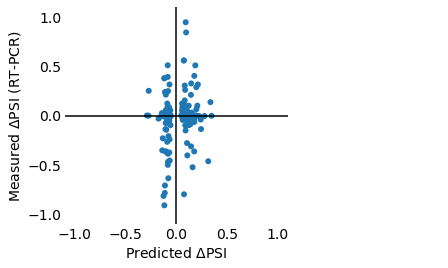

In [13]:

fig = figure(figsize=(4,4))
ax = fig.add_subplot(111)
colors = ['r','limegreen','b']

    
ax.scatter(np.array(sqtl[sqtl['strand']=='+']['slope']),np.array(total_effect_size),edgecolor='None')
ax.axhline(y=0,c='k')
ax.axvline(x=0,c='k')
ax.axis([-1,1,-1,1]);
leg = ax.legend(scatterpoints=1,bbox_to_anchor=(1.72,1),fontsize=fsize,handletextpad=-0.3)
leg.get_frame().set_alpha(0)
ax.axis([-1.1,1.1,-1.1,1.1])
ax.tick_params(labelsize=fsize)
ax.set_xlabel('Predicted $\Delta PSI$',fontsize=fsize)
ax.set_ylabel('Measured $\Delta PSI$ (RT-PCR)',fontsize=fsize)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(size=0)

print(scipy.stats.pearsonr(np.array(sqtl[sqtl['strand']=='+']['slope']),np.array(total_effect_size))[0]**2)

No handles with labels found to put in legend.


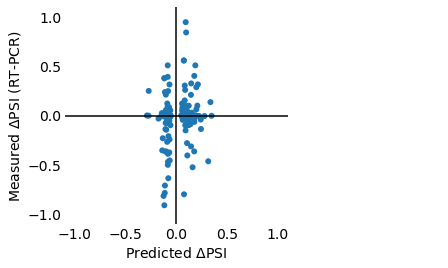

In [102]:

fig = figure(figsize=(4,4))
ax = fig.add_subplot(111)
colors = ['r','limegreen','b']

    
ax.scatter(np.array(sqtl[sqtl['strand']=='+']['slope']),np.array(total_effect_size),edgecolor='None')
ax.axhline(y=0,c='k')
ax.axvline(x=0,c='k')
ax.axis([-1,1,-1,1]);
leg = ax.legend(scatterpoints=1,bbox_to_anchor=(1.72,1),fontsize=fsize,handletextpad=-0.3)
leg.get_frame().set_alpha(0)
ax.axis([-1.1,1.1,-1.1,1.1])
ax.tick_params(labelsize=fsize)
ax.set_xlabel('Predicted $\Delta PSI$',fontsize=fsize)
ax.set_ylabel('Measured $\Delta PSI$ (RT-PCR)',fontsize=fsize)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(size=0)


In [39]:
for i in range(627):
    variant_pos = sqtl['variant_pos'].iloc[i]
    chr_now = sqtl['chr'].iloc[i]
    
    strand_now = sqtl['strand'].iloc[i]
    
    l_i,r_i = sqtl['phenotype_id'].iloc[i].split(':')[1:3]
    l_i=int(l_i)
    r_i=int(r_i)
    
#     ref_len = len(sqtl['ref'].iloc[i])
    
#     now_event = chr_now+':'+str(variant_pos)+'-'+str(int(variant_pos+ref_len-1))+'+'
    
    if strand_now=='+':
        continue
    
#     print(sqtl['phenotype_id'].iloc[i])
    
#     continue
    
    now_event = chr_now+':'+str(l_i+1)+'-'+str(l_i+2)+strand_now
    loc = locus(now_event,assembly='hg38')
    now_seq=loc.twoBitFrag().upper()
    print(now_seq,end=" ")
    
    now_event = chr_now+':'+str(r_i-2)+'-'+str(r_i-1)+strand_now
    loc = locus(now_event,assembly='hg38')
    now_seq=loc.twoBitFrag().upper()
    print(now_seq)


AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT

AG GT


In [ ]:
loc = locus('chr7:117225107-117235793+',assembly='hg19')

seq1=loc.twoBitFrag().upper()
seq1

In [22]:
sqtl

,phenotype_id,gene_name,strand,tss_distance,chr,variant_pos,ref,alt,pval_nominal,slope,slope_se,pval_perm,pval_beta,qval,pval_nominal_threshold
8,chr1:999787:999866:clu_35186:ENSG00000188290.10,HES4,-,-330,chr1,999842,C,A,1.140000e-12,-0.080326,0.010120,0.000200,2.250000e-06,4.140000e-05,2.600000e-06
11,chr1:1060393:1065830:clu_35200:ENSG00000217801.9,RP11-465B22.3,+,3468,chr1,1063202,G,C,1.150000e-29,0.107022,0.007094,0.000100,1.040000e-18,9.380000e-17,2.940000e-06
14,chr1:1228946:1231507:clu_35212:ENSG00000078808.16,SDF4,-,-524,chr1,1231507,T,C,3.910000e-41,0.149127,0.007310,0.000100,1.030000e-31,2.790000e-29,1.070000e-06
36,chr1:1734835:1738321:clu_35297:ENSG00000189339.11,SLC35E2B,-,42171,chr1,1734899,G,A,9.720000e-09,-0.128185,0.020813,0.001700,1.097470e-03,1.212150e-02,1.300000e-06
46,chr1:2185513:2193639:clu_35326:ENSG00000162585.16,FAAP20,-,-23041,chr1,2189679,C,T,2.270000e-05,0.056578,0.012840,0.720144,7.242030e-01,8.089060e-01,6.270000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,chr22:50294778:50295377:clu_20505:ENSG00000196...,PLXNB2,-,-13546,chr22,50294081,G,A,1.360000e-08,-0.066784,0.010969,0.019398,1.600940e-02,1.180380e-01,8.890000e-07
12962,chr22:50507035:50507582:clu_20547:ENSG00000100...,LMF2,-,-321,chr22,50507370,C,G,6.410000e-05,-0.092729,0.022395,0.868924,8.758710e-01,8.407850e-01,3.020000e-06
12967,chr22:50583323:50583598:clu_20574:ENSG00000205...,CHKB-AS1,+,3619,chr22,50586645,C,T,9.390000e-08,-0.056556,0.009960,0.000700,8.732760e-04,9.920890e-03,3.840000e-06
12968,chr22:50603719:50603973:clu_20579:ENSG00000008...,MAPK8IP2,+,3222,chr22,50603907,G,C,3.800000e-07,0.107821,0.020074,0.024398,2.628640e-02,1.716450e-01,2.040000e-06


,phenotype_id,gene_name,strand,tss_distance,chr,variant_pos,ref,alt,pval_nominal,slope,slope_se,pval_perm,pval_beta,qval,pval_nominal_threshold
8,chr1:999787:999866:clu_35186:ENSG00000188290.10,HES4,-,-330,chr1,999842,C,A,1.140000e-12,-0.080326,0.010120,0.000200,2.250000e-06,4.140000e-05,2.600000e-06
11,chr1:1060393:1065830:clu_35200:ENSG00000217801.9,RP11-465B22.3,+,3468,chr1,1063202,G,C,1.150000e-29,0.107022,0.007094,0.000100,1.040000e-18,9.380000e-17,2.940000e-06
14,chr1:1228946:1231507:clu_35212:ENSG00000078808.16,SDF4,-,-524,chr1,1231507,T,C,3.910000e-41,0.149127,0.007310,0.000100,1.030000e-31,2.790000e-29,1.070000e-06
36,chr1:1734835:1738321:clu_35297:ENSG00000189339.11,SLC35E2B,-,42171,chr1,1734899,G,A,9.720000e-09,-0.128185,0.020813,0.001700,1.097470e-03,1.212150e-02,1.300000e-06
55,chr1:3061331:3061591:clu_35365:ENSG00000177133.10,LINC00982,-,-6958,chr1,3061479,G,C,1.340000e-12,-0.076221,0.009641,0.002600,2.068320e-02,1.444620e-01,8.440000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12956,chr22:50253480:50255197:clu_20486:ENSG00000188...,MAPK12,-,-7406,chr22,50254419,G,A,4.520000e-11,0.079894,0.011044,0.000100,4.360000e-05,6.358580e-04,5.850000e-07
12957,chr22:50267949:50270177:clu_20496:ENSG00000185...,MAPK11,-,-2815,chr22,50267952,G,A,1.660000e-09,-0.106171,0.016283,0.001600,1.158800e-03,1.271060e-02,1.990000e-06
12958,chr22:50294778:50295377:clu_20505:ENSG00000196...,PLXNB2,-,-13546,chr22,50294081,G,A,1.360000e-08,-0.066784,0.010969,0.019398,1.600940e-02,1.180380e-01,8.890000e-07
12967,chr22:50583323:50583598:clu_20574:ENSG00000205...,CHKB-AS1,+,3619,chr22,50586645,C,T,9.390000e-08,-0.056556,0.009960,0.000700,8.732760e-04,9.920890e-03,3.840000e-06


In [25]:
ref_len

1